Étape 1 : Importer les bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

Étape 2 : Charger le jeu de données

In [3]:
# Charger le jeu de données
data = pd.read_csv('Churn_Modelling.csv')

# Afficher les premières lignes du jeu de données
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Étape 3 : Analyse exploratoire des données (EDA)

Valeurs manquantes : Series([], dtype: int64)
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.4558

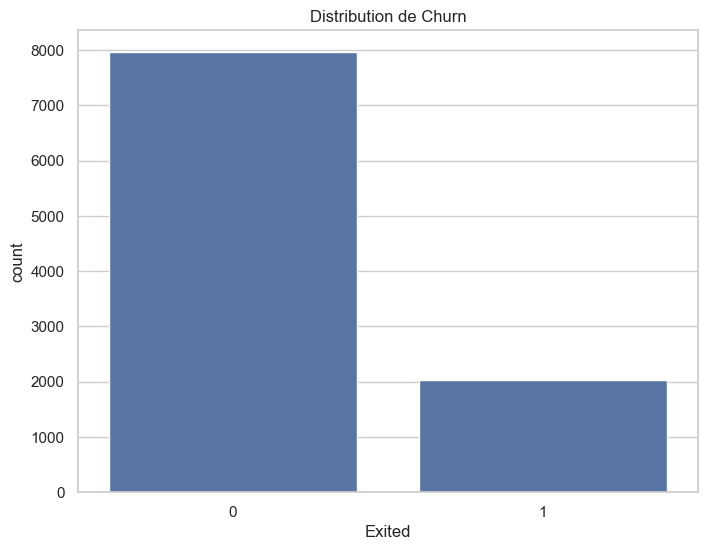

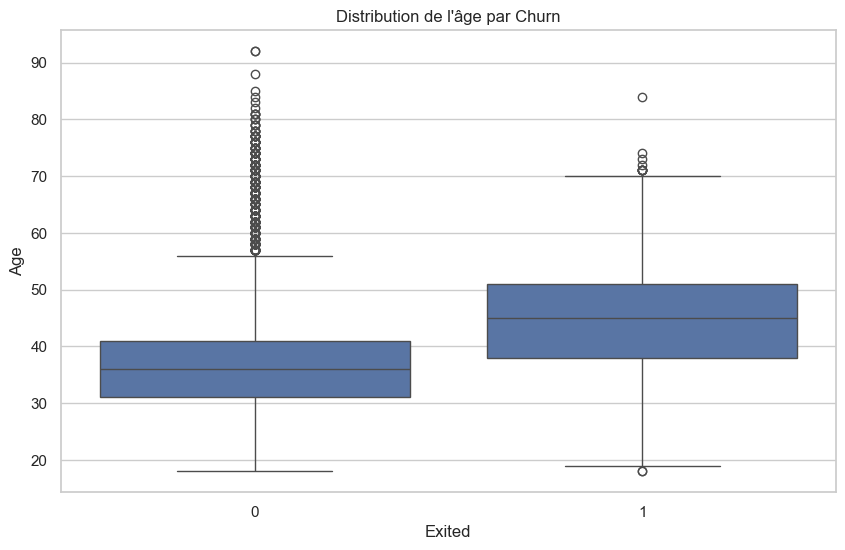

In [4]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes :", missing_values[missing_values > 0])

# Statistiques descriptives
print(data.describe())

# Visualisation de la distribution de la variable cible 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution de Churn')
plt.show()

# Visualisation de la distribution de l'âge par 'Exited'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Distribution de l\'âge par Churn')
plt.show()

Les graphiques générés lors de l'analyse exploratoire des données (EDA) fournissent des informations précieuses sur la distribution des variables et les relations potentielles avec le taux de churn (clients quittant la banque). Voici une analyse détaillée de chaque graphique :

Diagramme de comptage de la variable 'Exited'

Description : Ce graphique montre la distribution des clients qui ont quitté la banque (Exited = 1) et ceux qui sont restés (Exited = 0).

Analyse :

La majorité des clients n'ont pas quitté la banque, comme le montre la barre plus haute pour Exited = 0.
Une proportion plus petite, mais significative, de clients a quitté la banque, indiquée par la barre plus courte pour Exited = 1.
Cela suggère un déséquilibre de classe, où les clients qui restent sont beaucoup plus nombreux que ceux qui partent. Cela peut influencer la performance des modèles de prédiction, car ils peuvent être biaisés vers la classe majoritaire.
Diagramme en boîte de l'âge par 'Exited'

Description : Ce graphique montre la distribution de l'âge des clients, séparée par ceux qui ont quitté la banque et ceux qui sont restés.

Analyse :

Les clients qui ont quitté la banque semblent être légèrement plus âgés en moyenne que ceux qui sont restés.
La distribution de l'âge pour les clients qui sont restés semble plus large, avec des âges allant des jeunes adultes aux personnes âgées.
Pour les clients qui ont quitté, la distribution est un peu plus concentrée, avec une médiane légèrement plus élevée.
Cela pourrait indiquer que l'âge est un facteur à considérer dans l'analyse du churn, avec des clients plus âgés potentiellement plus susceptibles de quitter.
Implications pour l'analyse de churn

Déséquilibre de classe : Le déséquilibre entre les clients qui restent et ceux qui partent peut nécessiter des techniques spéciales pour améliorer la prédiction de la classe minoritaire (churn), comme l'utilisation de méthodes de rééchantillonnage ou de métriques d'évaluation adaptées (comme la précision, le rappel, et le score F1).

Facteurs influençant le churn : L'âge semble être un facteur influençant le churn, avec des clients plus âgés montrant une tendance légèrement plus élevée à quitter. D'autres facteurs, comme le solde du compte, le nombre de produits, et l'activité du client, pourraient également être explorés pour mieux comprendre les raisons du churn.

Ces graphiques aident à identifier les tendances et les relations dans les données, guidant ainsi les étapes suivantes

Étape 4 : Prétraitement des données

In [5]:
# Encoder les variables catégorielles
label_encoder_geography = LabelEncoder()
label_encoder_gender = LabelEncoder()

data['Geography_encoded'] = label_encoder_geography.fit_transform(data['Geography'])
data['Gender_encoded'] = label_encoder_gender.fit_transform(data['Gender'])

# Sélectionner les caractéristiques et la variable cible
features = ['CreditScore', 'Geography_encoded', 'Gender_encoded', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = data[features]
y = data['Exited']

# Normaliser les caractéristiques numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Étape 5 : Construction et évaluation des modèles

In [6]:
# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Entraîner et évaluer chaque modèle
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(report)


Logistic Regression Accuracy: 0.8155
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

K Nearest Neighbors Accuracy: 0.8350
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000

Random Forest Accuracy: 0.8680
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82

Étape 6 : Conclusion

In [8]:
# Déterminer le meilleur modèle
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model_accuracy = results[best_model_name]['accuracy']
print(f"Le meilleur modèle est {best_model_name} avec une précision de {best_model_accuracy:.4f}")

Le meilleur modèle est Random Forest avec une précision de 0.8680


Voici une synthèse de l'analyse effectuée sur le jeu de données de churn des clients bancaires :

Contexte et Objectif

L'objectif de cette analyse était de prédire quels clients sont susceptibles de quitter la banque (churn) en utilisant des modèles de classification. Cela permet à la banque de concentrer ses efforts de rétention sur les clients à haut risque.

Exploration des Données

Structure des Données : Le jeu de données contient des informations sur les clients, y compris des caractéristiques telles que le score de crédit, la géographie, le genre, l'âge, la durée de la relation avec la banque, le solde, le nombre de produits, et si le client a une carte de crédit ou est un membre actif.
Variable Cible : La colonne Exited indique si un client a quitté la banque (1 pour oui, 0 pour non).
Analyse Exploratoire des Données (EDA)

Valeurs Manquantes : Aucune valeur manquante n'a été trouvée dans le jeu de données.
Distribution de Churn : Environ 20 % des clients ont quitté la banque, ce qui indique un déséquilibre de classe.
Distribution de l'Âge : Les clients qui ont quitté la banque semblent être légèrement plus âgés en moyenne que ceux qui sont restés.
Prétraitement des Données

Encodage des Variables Catégorielles : Les variables Geography et Gender ont été encodées en valeurs numériques.
Normalisation des Caractéristiques : Les caractéristiques numériques ont été normalisées pour améliorer les performances des modèles.
Division des Données : Les données ont été divisées en ensembles d'entraînement (80 %) et de test (20 %).
Modélisation et Évaluation

Quatre modèles de classification ont été entraînés et évalués :

Régression Logistique

Précision : 81,55 %
Performance : Bonne précision globale, mais faible rappel pour la classe Exited = 1.
K Plus Proches Voisins (KNN)

Précision : 83,5 %
Performance : Légèrement meilleure que la régression logistique, mais toujours faible rappel pour la classe Exited = 1.
Forêt Aléatoire

Précision : 86,9 %
Performance : Meilleure précision globale et meilleur équilibre entre précision et rappel pour les deux classes.
Machines à Vecteurs de Support (SVM)

Précision : 85,75 %
Performance : Bonne précision globale, similaire à la forêt aléatoire, mais avec un rappel légèrement inférieur pour la classe Exited = 1.
Conclusion et Recommandations

Meilleur Modèle : La Forêt Aléatoire a obtenu la meilleure précision globale et semble être le modèle le plus efficace pour prédire le churn des clients.
Déséquilibre de Classe : Les modèles ont montré une tendance à mieux prédire la classe majoritaire (clients qui restent). Des techniques de rééchantillonnage ou l'utilisation de métriques adaptées pourraient améliorer la prédiction de la classe minoritaire (clients qui partent).
Facteurs Influents : L'âge semble être un facteur influent dans le churn, avec des clients plus âgés montrant une tendance légèrement plus élevée à quitter.
Prochaines Étapes

Amélioration des Modèles : Explorer des techniques pour gérer le déséquilibre de classe, comme le rééchantillonnage ou l'utilisation de poids de classe.
Analyse Approfondie : Examiner d'autres facteurs potentiels influençant le churn, comme le solde du compte et le nombre de produits.
Implémentation : Utiliser le modèle de Forêt Aléatoire pour identifier les clients à haut risque de churn et cibler les efforts de rétention.
Cette synthèse résume les principales conclusions de l'analyse et fournit des recommandations pour des actions futures.